In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

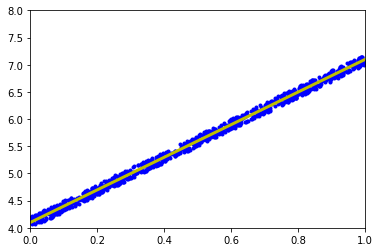

In [20]:
X=np.random.rand(1000,1)
# print(np.max(X))
# print("x",X)
y=4+3*X+.2*np.random.rand(1000,1)
one=np.ones((X.shape[0], 1))
Xbar=np.concatenate((one, X), axis=1)
# print("Xbar", Xbar)
A=np.dot(Xbar.T, Xbar)
B=np.dot(Xbar.T, y)
w=np.dot(np.linalg.pinv(A), B)
x0=np.array([0.,1.])
# print(w.T)
y0=w[1][0]*x0+w[0][0]
# print(w)
plt.plot(X.T, y.T, "b.")
plt.plot(x0.T, y0.T,'y', linewidth=3)
plt.axis([0.,1.,4.,8.])
plt.show()

In [16]:
# tính đạo hàm
def grad(w):
    N=Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w)-y)
# tính hàm mất mát
def cost(w):
    N=Xbar.shape[0]
    return .5/N*np.linalg.norm(y-Xbar.dot(w), 2)**2

In [21]:
# tương đối đạo hàm
def numerical_grad(w, cost):
    eps=1e-4
    g=np.zeros_like(w)
    for i in range(len(w)):
        #  tạo bản sao của w
        wp=w.copy()
        wn=w.copy()
        wp[i]+=eps;
        wn[i]-=eps
        g[i]=(cost(wp)-cost(wn))/(2*eps)
    return g
# kiểm tra sai số giữa kết quả tính đạo hàm tương đối và đạo hàm
def check_grad(w, cost, grad):
    #tạo mảng random các giá trị nhỏ hơn 1 có chiểu giống vói w
    w=np.random.rand(w.shape[0], w.shape[1])
    # kết quả tính đạo hàm
    grad1=grad(w);
    # kết quả tính tương đối đạo hàm
    grad2=numerical_grad(w, cost)
    # tính toán khoảng cách giữa 2 vector đạo hàm theo chuẩn 2
    return True if np.linalg.norm(grad1-grad2)<1e-6 else False
print(check_grad(np.random.rand(2,1), cost, grad))
# tính toán gradient descent
def myGD(w_init, grad, eta):
    # chuyển ma trận thành mảng để lưu các giá trị w sau mỗi lần lặp
    w=[w_init]
    for it in range(100):
        # tính toán giá trị x(t+1) theo learning rate và đạo hàm
        w_new=w[-1]-eta*grad(w[-1])
        # tính chuẩn của đạo hàm với giá trị mới
        if np.linalg.norm(grad(w_new))/len(w_new)< 1e-3:
            break
        w.append(w_new)
    print(it)
    return (w, it)
w_init=np.array([[2],
                [1]])
(w1, it1)=myGD(w_init, grad, 1)
print(w1[-1].T)
print(it1+1)

True
46
[[4.11099444 2.97418503]]
47


In [ ]:
# kiểm tra giá trị thỏa mãn globalmin
def has_converged(theta_new, grad):
        return np.linalg.norm(grad(theta_new))/len(theta_new)< 1e-3
def GD_momentum(theta_init, grad, eta, gamma):
    # chuyền về mảng để lưu các vị trí mới
    theta=[theta_init]
    v_old=np.zeros_like(theta_init)
    
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new= theta[-1]-v_new
        if(has_converged(theta_new, grad)):
            break
        theta_append(theta_new)
        v_old=v_new
    return theta
x=np.random()
print(GD_momentum)        